In [1]:
import numpy as np
import statistics
import pandas as pd
# import cv2
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten,MaxPooling2D
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import tensorflow as tf
from PIL import Image
# from os import walk
import os, glob

Using TensorFlow backend.


In [2]:
def create_data(dir):
    pixels = []
    hemmor_labels = []

    height  = 64
    width = 64
    for infile in glob.glob("./"+dir+"/hemmorhage_data/*.png"):
        img =  Image.open(infile)
        img = img.resize((width, height), Image.ANTIALIAS).convert("RGB")
        img = np.asarray(img)/255.0
        img = img.tolist()
        pixels.append(img)
        hemmor_labels.append(1)

    for infile in glob.glob("./"+dir+"/non_hemmorhage_data/*.png"):
        img =  Image.open(infile)
        img = img.resize((width, height), Image.ANTIALIAS).convert("RGB")
        img = np.asarray(img)/255.0
        img = img.tolist()
        pixels.append(img)
        hemmor_labels.append(0)

    data = {"pixels" : pixels, "hemmorhage" :hemmor_labels }

    data = pd.DataFrame(data)
    data = data.sample(frac=1).reset_index(drop=True)
    return data

In [3]:
train = create_data("training_set")
xtrain = train["pixels"]
xtrain = np.asarray(xtrain.to_numpy().tolist())
ytrain = train[["hemmorhage"]]
ytrain = ytrain.to_numpy()
test = create_data("test_set")
xtest = test["pixels"]
xtest = np.asarray(xtest.to_numpy().tolist())
ytest = test[["hemmorhage"]]
ytest = ytest.to_numpy()

In [31]:
model = Sequential()

model.add(Conv2D(32,kernel_size= 3,padding='valid',activation='relu',input_shape=(64,64,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(32,kernel_size= 3,padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64,kernel_size= 3,padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(800,activation='relu'))
model.add(Dense(400,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [32]:
history = model.fit(xtrain, ytrain, validation_data=(xtest, ytest), epochs=60)

Train on 180 samples, validate on 20 samples
Epoch 1/60
180/180 [==============================] - 1s 5ms/step - loss: 0.6763 - acc: 0.5333 - val_loss: 0.6921 - val_acc: 0.5000
Epoch 2/60
180/180 [==============================] - 0s 1ms/step - loss: 0.6500 - acc: 0.5833 - val_loss: 0.7016 - val_acc: 0.5000
Epoch 3/60
180/180 [==============================] - 0s 1ms/step - loss: 0.6350 - acc: 0.6000 - val_loss: 0.7309 - val_acc: 0.5000
Epoch 4/60
180/180 [==============================] - 0s 1ms/step - loss: 0.5382 - acc: 0.7222 - val_loss: 0.5267 - val_acc: 0.7000
Epoch 5/60
180/180 [==============================] - 0s 1ms/step - loss: 0.4363 - acc: 0.7944 - val_loss: 0.6339 - val_acc: 0.7000
Epoch 6/60
180/180 [==============================] - 0s 1ms/step - loss: 0.4412 - acc: 0.8222 - val_loss: 0.5034 - val_acc: 0.7500
Epoch 7/60
180/180 [==============================] - 0s 1ms/step - loss: 0.3829 - acc: 0.7944 - val_loss: 0.6823 - val_acc: 0.6500
Epoch 8/60
180/180 [===========

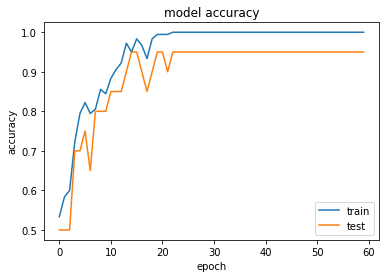

In [35]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

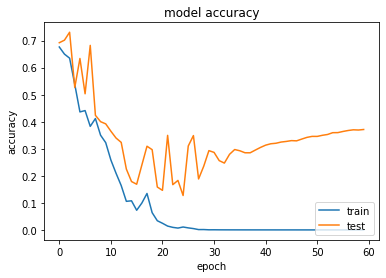

In [34]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show() # which shows that the model is somehow overfitting

[[0.999995]]


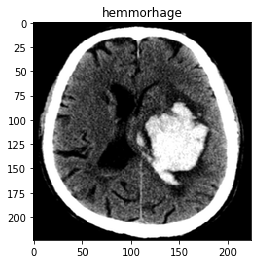

In [55]:
img =  Image.open("./test_set/hemmorhage_data/003.png")
imgshow= np.asarray(img.resize((224, 224), Image.ANTIALIAS).convert("RGB"))
img= np.asarray(img.resize((64, 64), Image.ANTIALIAS).convert("RGB"))

imgn = img/255.0
imgnlist = [imgn.tolist()]
# print(imgnlist)
yp = model.predict(np.asarray(imgnlist))
print(yp)
title = "hemmorhage" if yp[0] >= 0.5 else "nonhemmorhage"
plt.title(title)
plt.imshow(np.asarray(imgshow))